Example 1: Data = {1, 3, 5}
Data: [1 3 5]
N = 3
x̄ = 3.000
x̄² = 11.667
Hyperparameters: μ₀=0, λ₀=1, a₀=2, b₀=2
--------------------------------------------------
Initial values: m=2, v=2, a=3, b=3
--------------------------------------------------

Iteration 1:
  Update q(μ):
  E_q[τ] = a/b = 3/3.000 = 1.000
  m = (N·x̄ + λ₀·μ₀)/(N + λ₀) = (3·3.000 + 1·0)/(3 + 1)
    = 9.000/4 = 2.250
  v = 1/((N + λ₀)·E_q[τ]) = 1/((3 + 1)·1.000)
    = 1/4.000 = 0.250

  Update q(τ):
  E_q[μ] = m = 2.250
  E_q[μ²] = m² + v = 2.250² + 0.250 = 5.312
  a = a₀ + (N+1)/2 = 2 + (3+1)/2 = 4.000
  b calculation:
    b₀ = 2.000
    + N·x̄²/2 = 3·11.667/2 = 17.500
    - E_q[μ]·(N·x̄ + λ₀·μ₀) = 2.250·(3·3.000 + 1·0)
      = 2.250·9.000 = 20.250
    + E_q[μ²]·(N + λ₀)/2 = 5.312·(3 + 1)/2 = 10.625
    + λ₀·μ₀²/2 = 1·0²/2 = 0.000
    b = 2.000 + 17.500 - 20.250 + 10.625 + 0.000 = 9.875

  Summary: q(μ) ~ N(2.250, 0.250), q(τ) ~ Gamma(4.000, 9.875)
--------------------------------------------------

Iteration 2:
  U

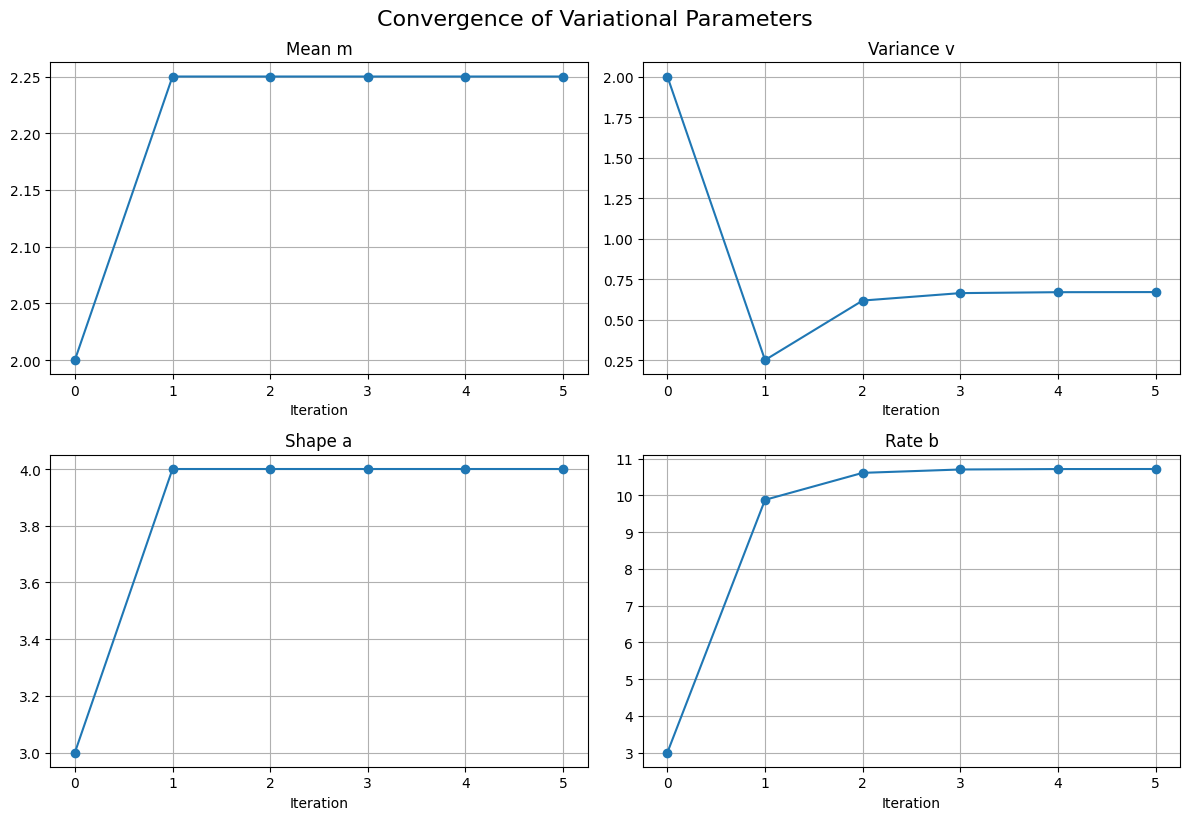

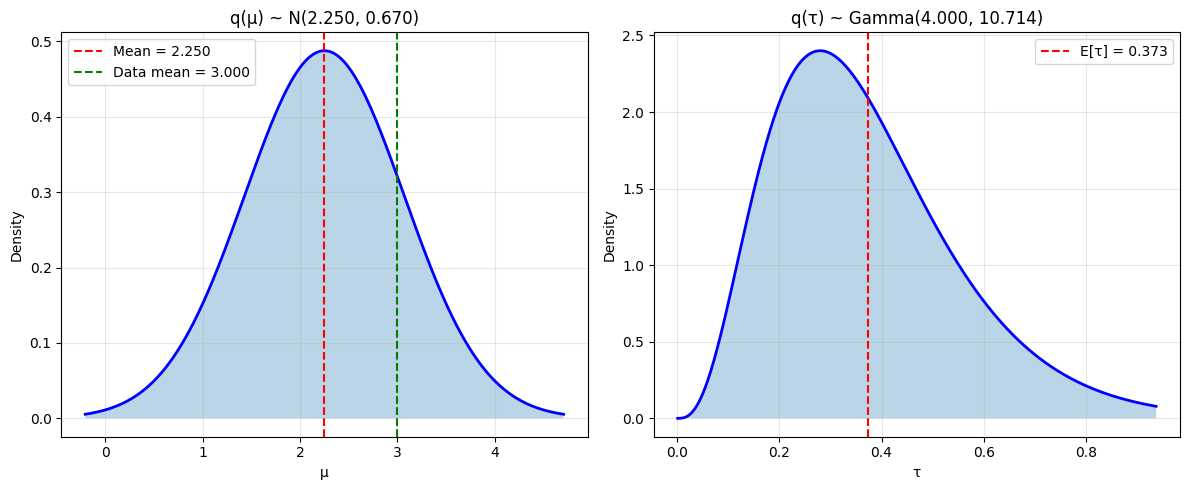



Example 2: Centered data = {-2, 0, 2}
Data: [-2  0  2]
N = 3
x̄ = 0.000
x̄² = 2.667
Hyperparameters: μ₀=0, λ₀=1, a₀=2, b₀=2
--------------------------------------------------
Initial values: m=1, v=1, a=3, b=3
--------------------------------------------------

Iteration 1:
  Update q(μ):
  E_q[τ] = a/b = 3/3.000 = 1.000
  m = (N·x̄ + λ₀·μ₀)/(N + λ₀) = (3·0.000 + 1·0)/(3 + 1)
    = 0.000/4 = 0.000
  v = 1/((N + λ₀)·E_q[τ]) = 1/((3 + 1)·1.000)
    = 1/4.000 = 0.250

  Update q(τ):
  E_q[μ] = m = 0.000
  E_q[μ²] = m² + v = 0.000² + 0.250 = 0.250
  a = a₀ + (N+1)/2 = 2 + (3+1)/2 = 4.000
  b calculation:
    b₀ = 2.000
    + N·x̄²/2 = 3·2.667/2 = 4.000
    - E_q[μ]·(N·x̄ + λ₀·μ₀) = 0.000·(3·0.000 + 1·0)
      = 0.000·0.000 = 0.000
    + E_q[μ²]·(N + λ₀)/2 = 0.250·(3 + 1)/2 = 0.500
    + λ₀·μ₀²/2 = 1·0²/2 = 0.000
    b = 2.000 + 4.000 - 0.000 + 0.500 + 0.000 = 6.500

  Summary: q(μ) ~ N(0.000, 0.250), q(τ) ~ Gamma(4.000, 6.500)
--------------------------------------------------

Iteration

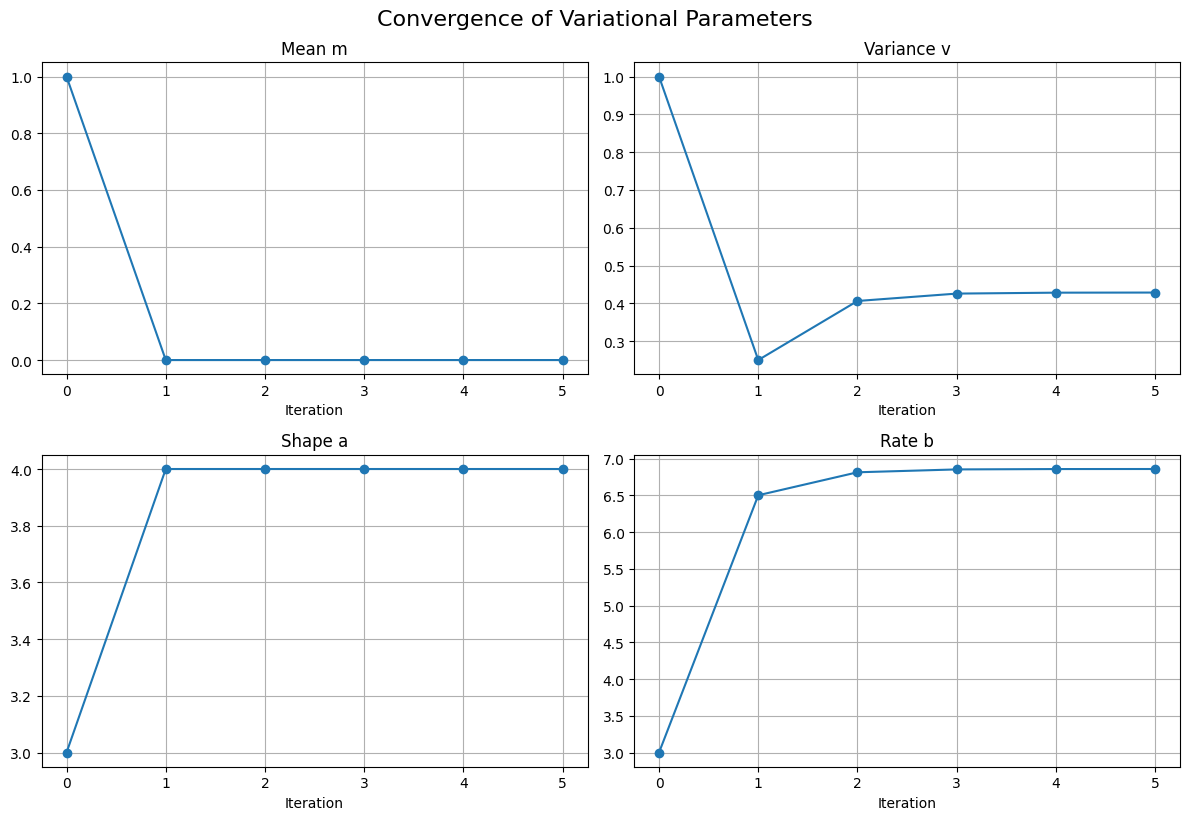

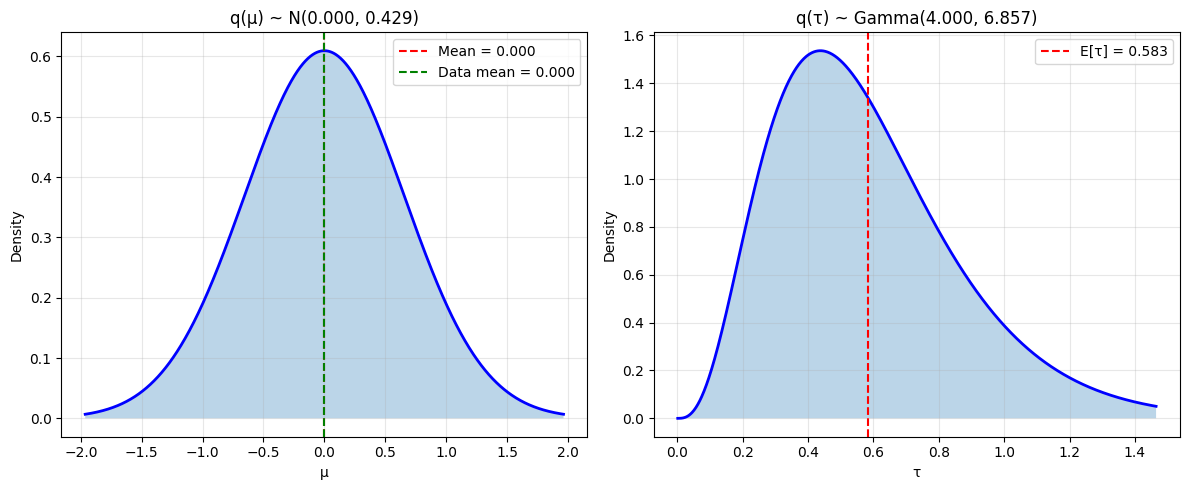

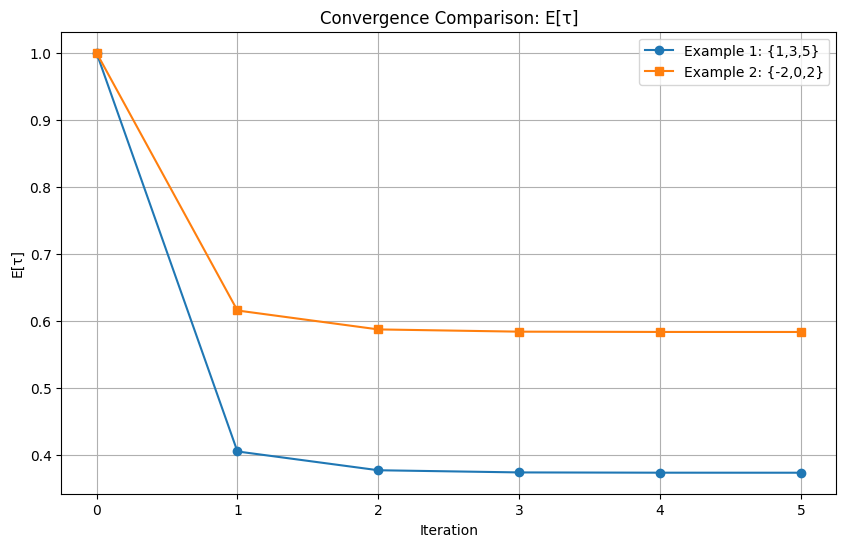

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
from scipy.special import gammaln

# Helper functions for log PDFs
def log_npdf(x, m, v):
    """Log probability density function of normal distribution"""
    return -0.5 * np.log(2 * np.pi * v) - 0.5 * (x - m)**2 / v

def log_gamma_pdf(x, a, b):
    """Log probability density function of gamma distribution"""
    return -gammaln(a) + a * np.log(b) + (a-1) * np.log(x) - b * x

class VariationalGaussian:
    """
    Variational inference for Gaussian with unknown mean and precision
    using coordinate ascent variational inference (CAVI)
    """
    
    def __init__(self, x, mu0=0, lambda0=1, a0=2, b0=2):
        """
        Initialize with data and hyperparameters
        
        Args:
            x: array of observations
            mu0: prior mean for mu
            lambda0: prior precision weight for mu
            a0: prior shape for tau (Gamma distribution)
            b0: prior rate for tau (Gamma distribution)
        """
        self.x = np.array(x)
        self.N = len(x)
        self.mu0 = mu0
        self.lambda0 = lambda0
        self.a0 = a0
        self.b0 = b0
        
        # Compute data statistics
        self.xbar = np.mean(self.x)
        self.x2bar = np.mean(self.x**2)
        
        print(f"Data: {self.x}")
        print(f"N = {self.N}")
        print(f"x̄ = {self.xbar:.3f}")
        print(f"x̄² = {self.x2bar:.3f}")
        print(f"Hyperparameters: μ₀={mu0}, λ₀={lambda0}, a₀={a0}, b₀={b0}")
        print("-" * 50)
    
    def initialize(self, m=2, v=2, a=3, b=3):
        """Initialize variational parameters"""
        self.m = m
        self.v = v
        self.a = a
        self.b = b
        
        print(f"Initial values: m={m}, v={v}, a={a}, b={b}")
        print("-" * 50)
        
        return self
    
    def update_q_mu(self, verbose=True):
        """Update q(μ) parameters"""
        # Expectation of tau under current q(tau)
        E_tau = self.a / self.b
        
        # Update m (mean of q(mu))
        m_new = (self.N * self.xbar + self.lambda0 * self.mu0) / (self.N + self.lambda0)
        
        # Update v (variance of q(mu))
        v_new = 1 / ((self.N + self.lambda0) * E_tau)
        
        if verbose:
            print(f"  E_q[τ] = a/b = {self.a}/{self.b:.3f} = {E_tau:.3f}")
            print(f"  m = (N·x̄ + λ₀·μ₀)/(N + λ₀) = ({self.N}·{self.xbar:.3f} + {self.lambda0}·{self.mu0})/({self.N} + {self.lambda0})")
            print(f"    = {self.N * self.xbar + self.lambda0 * self.mu0:.3f}/{self.N + self.lambda0} = {m_new:.3f}")
            print(f"  v = 1/((N + λ₀)·E_q[τ]) = 1/(({self.N} + {self.lambda0})·{E_tau:.3f})")
            print(f"    = 1/{(self.N + self.lambda0) * E_tau:.3f} = {v_new:.3f}")
        
        self.m = m_new
        self.v = v_new
    
    def update_q_tau(self, verbose=True):
        """Update q(τ) parameters"""
        # Expectations under current q(mu)
        E_mu = self.m
        E_mu2 = self.m**2 + self.v
        
        # Update a (shape of q(tau))
        a_new = self.a0 + (self.N + 1) / 2
        
        # Update b (rate of q(tau)) - break down the calculation
        term1 = self.b0
        term2 = self.N * self.x2bar / 2
        term3 = E_mu * (self.N * self.xbar + self.lambda0 * self.mu0)
        term4 = E_mu2 * (self.N + self.lambda0) / 2
        term5 = self.lambda0 * self.mu0**2 / 2
        
        b_new = term1 + term2 - term3 + term4 + term5
        
        if verbose:
            print(f"  E_q[μ] = m = {E_mu:.3f}")
            print(f"  E_q[μ²] = m² + v = {self.m:.3f}² + {self.v:.3f} = {E_mu2:.3f}")
            print(f"  a = a₀ + (N+1)/2 = {self.a0} + ({self.N}+1)/2 = {a_new:.3f}")
            print(f"  b calculation:")
            print(f"    b₀ = {term1:.3f}")
            print(f"    + N·x̄²/2 = {self.N}·{self.x2bar:.3f}/2 = {term2:.3f}")
            print(f"    - E_q[μ]·(N·x̄ + λ₀·μ₀) = {E_mu:.3f}·({self.N}·{self.xbar:.3f} + {self.lambda0}·{self.mu0})")
            print(f"      = {E_mu:.3f}·{self.N * self.xbar + self.lambda0 * self.mu0:.3f} = {term3:.3f}")
            print(f"    + E_q[μ²]·(N + λ₀)/2 = {E_mu2:.3f}·({self.N} + {self.lambda0})/2 = {term4:.3f}")
            print(f"    + λ₀·μ₀²/2 = {self.lambda0}·{self.mu0}²/2 = {term5:.3f}")
            print(f"    b = {term1:.3f} + {term2:.3f} - {term3:.3f} + {term4:.3f} + {term5:.3f} = {b_new:.3f}")
        
        self.a = a_new
        self.b = b_new
    
    def fit(self, num_iterations=5, verbose=True):
        """Run CAVI algorithm"""
        history = {
            'm': [self.m],
            'v': [self.v],
            'a': [self.a],
            'b': [self.b],
            'E_tau': [self.a/self.b]
        }
        
        for i in range(num_iterations):
            if verbose:
                print(f"\nIteration {i+1}:")
                print("  Update q(μ):")
            
            self.update_q_mu(verbose)
            
            if verbose:
                print("\n  Update q(τ):")
            
            self.update_q_tau(verbose)
            
            # Store history
            history['m'].append(self.m)
            history['v'].append(self.v)
            history['a'].append(self.a)
            history['b'].append(self.b)
            history['E_tau'].append(self.a/self.b)
            
            if verbose:
                print(f"\n  Summary: q(μ) ~ N({self.m:.3f}, {self.v:.3f}), q(τ) ~ Gamma({self.a:.3f}, {self.b:.3f})")
                print("-" * 50)
        
        self.history = history
        return self
    
    def plot_convergence(self):
        """Plot convergence of variational parameters"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
        
        iterations = range(len(self.history['m']))
        
        ax1.plot(iterations, self.history['m'], 'o-')
        ax1.set_title('Mean m')
        ax1.set_xlabel('Iteration')
        ax1.grid(True)
        
        ax2.plot(iterations, self.history['v'], 'o-')
        ax2.set_title('Variance v')
        ax2.set_xlabel('Iteration')
        ax2.grid(True)
        
        ax3.plot(iterations, self.history['a'], 'o-')
        ax3.set_title('Shape a')
        ax3.set_xlabel('Iteration')
        ax3.grid(True)
        
        ax4.plot(iterations, self.history['b'], 'o-')
        ax4.set_title('Rate b')
        ax4.set_xlabel('Iteration')
        ax4.grid(True)
        
        plt.tight_layout()
        plt.suptitle('Convergence of Variational Parameters', y=1.02, fontsize=16)
        plt.show()
    
    def plot_distributions(self):
        """Plot the approximate posterior distributions"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Plot q(μ)
        mu_range = np.linspace(self.m - 3*np.sqrt(self.v), self.m + 3*np.sqrt(self.v), 1000)
        pdf_mu = norm.pdf(mu_range, self.m, np.sqrt(self.v))
        ax1.plot(mu_range, pdf_mu, 'b-', linewidth=2)
        ax1.fill_between(mu_range, pdf_mu, alpha=0.3)
        ax1.axvline(self.m, color='r', linestyle='--', label=f'Mean = {self.m:.3f}')
        ax1.axvline(self.xbar, color='g', linestyle='--', label=f'Data mean = {self.xbar:.3f}')
        ax1.set_title(f'q(μ) ~ N({self.m:.3f}, {self.v:.3f})')
        ax1.set_xlabel('μ')
        ax1.set_ylabel('Density')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot q(τ)
        tau_range = np.linspace(0.001, gamma.ppf(0.99, self.a, scale=1/self.b), 1000)
        pdf_tau = gamma.pdf(tau_range, self.a, scale=1/self.b)
        ax2.plot(tau_range, pdf_tau, 'b-', linewidth=2)
        ax2.fill_between(tau_range, pdf_tau, alpha=0.3)
        E_tau = self.a / self.b
        ax2.axvline(E_tau, color='r', linestyle='--', label=f'E[τ] = {E_tau:.3f}')
        ax2.set_title(f'q(τ) ~ Gamma({self.a:.3f}, {self.b:.3f})')
        ax2.set_xlabel('τ')
        ax2.set_ylabel('Density')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Example 1: Original data
print("Example 1: Data = {1, 3, 5}")
print("=" * 50)

vi_model1 = VariationalGaussian(x=[1, 3, 5], mu0=0, lambda0=1, a0=2, b0=2)
vi_model1.initialize(m=2, v=2, a=3, b=3)
vi_model1.fit(num_iterations=5, verbose=True)

print("\nFinal Results:")
print(f"q(μ) ~ N({vi_model1.m:.3f}, {vi_model1.v:.3f})")
print(f"q(τ) ~ Gamma({vi_model1.a:.3f}, {vi_model1.b:.3f})")
print(f"E[τ] = {vi_model1.a/vi_model1.b:.3f}")
print(f"Implied σ = {1/np.sqrt(vi_model1.a/vi_model1.b):.3f}")

vi_model1.plot_convergence()
vi_model1.plot_distributions()

# Example 2: Centered data
print("\n\nExample 2: Centered data = {-2, 0, 2}")
print("=" * 50)

vi_model2 = VariationalGaussian(x=[-2, 0, 2], mu0=0, lambda0=1, a0=2, b0=2)
vi_model2.initialize(m=1, v=1, a=3, b=3)
vi_model2.fit(num_iterations=5, verbose=True)

print("\nFinal Results:")
print(f"q(μ) ~ N({vi_model2.m:.3f}, {vi_model2.v:.3f})")
print(f"q(τ) ~ Gamma({vi_model2.a:.3f}, {vi_model2.b:.3f})")
print(f"E[τ] = {vi_model2.a/vi_model2.b:.3f}")
print(f"Implied σ = {1/np.sqrt(vi_model2.a/vi_model2.b):.3f}")

vi_model2.plot_convergence()
vi_model2.plot_distributions()

# Compare convergence rates
plt.figure(figsize=(10, 6))
plt.plot(vi_model1.history['E_tau'], 'o-', label='Example 1: {1,3,5}')
plt.plot(vi_model2.history['E_tau'], 's-', label='Example 2: {-2,0,2}')
plt.xlabel('Iteration')
plt.ylabel('E[τ]')
plt.title('Convergence Comparison: E[τ]')
plt.legend()
plt.grid(True)
plt.show()